PROYECTO 2


    Nombre Completo: Nicolás Sarmiento
    ID Coding Dojo: 76110
    Nombre del proyecto: Mobile Price Classification
    


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


PARTE 1


Creen un cuaderno de Colab donde hayan subido y mostrado el .head() de cada uno de los conjuntos de datos.  Para cada uno de los conjuntos de datos propuestos, respondan las siguientes preguntas:

1) Fuente de datos

2) Breve descripción de datos

3) ¿Cuál es el objetivo?

4) ¿Este es un problema de clasificación o regresión?

5) ¿Cuántas características hay?

6) ¿Cuántas filas de datos hay?

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sb 
from termcolor import colored as cl
from matplotlib import cm
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

DESCRIPCIÓN DE LOS DATOS

| Nombre        | Descripción                                                      |
|---------------|------------------------------------------------------------------|
| battery_power | Total energy a battery can store in one time measured in mAh     |
| blue          | Has bluetooth or not                                             |
| clock_speed   | Speed at which microprocessor executes instructions              |
| dual_sim      | Has dual sim support or not                                      |
| fc            | Front camera mega pixels                                         |
| four_g        | Has 4G or not                                                    |
| int_memory    | Internal Memory in Gigabytes                                     |
| m_dep         | Mobile Depth in cm                                               |
| mobile_wt     | Weight of mobile phone                                           |
| n_cores       | Number of cores of processor                                     |
| pc            | Primary camera mega pixels                                       |
| px_height     | Pixel resolution Height                                          |
| px_width      | Pixel resolution width                                           |
| ram           | Random Access Memory in gigabytes                                |
| sc_h          | Screen Height of mobile in cm                                    |
| sc_w          | Screen Width of mobile in cm                                     |
| talk_time     | longest time that a single battery charge will last when you are |
| three_g       | Has 3G or not                                                    |
| touch_screen  | Has touch screen or not                                          |
| wifi          | Has wifi or not                                                  |
| price_range   | Price Range                                                      |

Objetivo del proyecto: analizar la data y ver cual o cuales modelos de aprendizaje supervisado funcionan mejor para predecir el rango de precio de los telefonos moviles y su valor más alto.

Importación y análisis exploratorio

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/COLAB NOTEBOOKS CODING DOJO/DATOS PROYECTO 2 /train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.shape

(2000, 21)

tenemos un total de 2000 filas

In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [ ]:
df.duplicated().sum()

0

no hay duplicados


In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

no hay valores nulos

In [ ]:
df.isnull().values.any()

False

nuevamente se verifica si hay valores nulos con otro método

In [ ]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

nos encontramos frente a un problema de clasificación y esto lo obtenemos gracias a ver las caracteristicas del vector obejtivo.

In [ ]:
print(f"La cantidad de caracteristicas es: {len(df.keys())}") 
print(f"Las caracteristicas a trabajar son: {df.columns}")

La cantidad de caracteristicas es: 21
Las caracteristicas a trabajar son: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


No se encontraron duplicados ni en las filas ni en las columnas, tampoco encontramos datos faltantes.

PARTE 2


Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes 

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra



In [ ]:
df["battery_power"].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

In [ ]:
df["battery_power"].nunique()

1094

In [ ]:
df["blue"].value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [ ]:
df["blue"].nunique()

2

In [ ]:
df["clock_speed"].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [ ]:
df["clock_speed"].nunique()

26

In [ ]:
df["dual_sim"].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [ ]:
df["dual_sim"].nunique()

2

In [ ]:
df["fc"].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [ ]:
df["fc"].nunique()

20

In [ ]:
df["four_g"].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [ ]:
df["four_g"].nunique()

2

In [ ]:
df["int_memory"].value_counts()

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

In [ ]:
df["int_memory"].nunique()

63

In [ ]:
df["m_dep"].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

In [ ]:
df["m_dep"].nunique()

10

In [ ]:
df["mobile_wt"].value_counts()

182    28
101    27
185    27
146    26
199    26
       ..
116    10
140     9
120     9
149     9
96      9
Name: mobile_wt, Length: 121, dtype: int64

In [ ]:
df["mobile_wt"].nunique()

121

In [ ]:
df["n_cores"].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [ ]:
df["n_cores"].nunique()

8

In [ ]:
df["pc"].value_counts()

10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

In [ ]:
df["pc"].nunique()

21

In [ ]:
df["px_height"].value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

In [ ]:
df["px_height"].nunique()

1137

In [ ]:
df["px_width"].value_counts()

874     7
1247    7
1383    6
1463    6
1469    6
       ..
1125    1
1367    1
1569    1
1481    1
1632    1
Name: px_width, Length: 1109, dtype: int64

In [ ]:
df["px_width"].nunique()

1109

In [ ]:
df["ram"].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

In [ ]:
df["ram"].nunique()

1562

In [ ]:
df["sc_h"].value_counts()

17    193
12    157
7     151
16    143
14    143
15    135
13    131
11    126
10    125
9     124
19    124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

In [ ]:
df["sc_h"].nunique()

15

In [ ]:
df["sc_w"].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

In [ ]:
df["sc_w"].nunique()

19

In [ ]:
df["talk_time"].value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
18    100
9     100
2      99
12     99
17     98
3      94
5      93
Name: talk_time, dtype: int64

In [ ]:
df["talk_time"].nunique()

19

In [ ]:
df["three_g"].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [ ]:
df["three_g"].nunique()

2

In [ ]:
df["touch_screen"].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [ ]:
df["touch_screen"].nunique()

2

In [ ]:
df["wifi"].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [ ]:
df["wifi"].nunique()

2

In [ ]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
df["price_range"].nunique()

4

no hay valores categoricos, por ende no hay inconsistencias de este tipo de datos

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


revision del conjunto de datos en cada variable

Gráficos


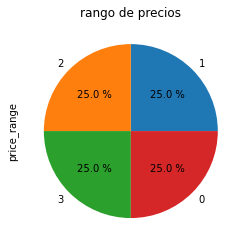

In [ ]:
df['price_range'].value_counts().plot(kind="pie",title="rango de precios",autopct="%0.1f %%");

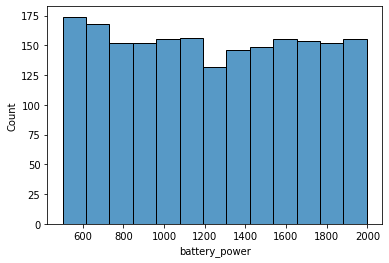

In [ ]:
sns.histplot(df["battery_power"])
plt.ticklabel_format()

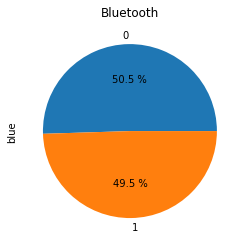

In [ ]:
df['blue'].value_counts().plot(kind="pie",title="Bluetooth",autopct="%0.1f %%");

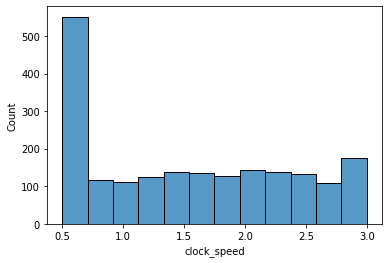

In [ ]:
sns.histplot(df["clock_speed"])
plt.ticklabel_format()

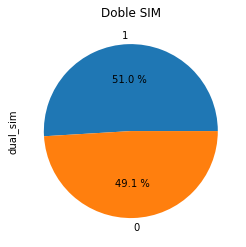

In [ ]:
df['dual_sim'].value_counts().plot(kind="pie",title="Doble SIM",autopct="%0.1f %%");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


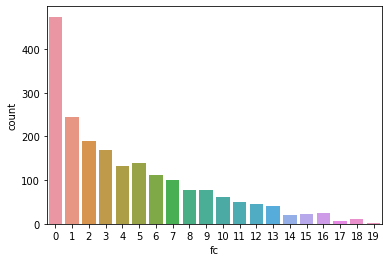

In [ ]:
sns.countplot(df['fc'])
plt.ticklabel_format()

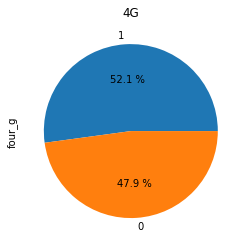

In [ ]:
df['four_g'].value_counts().plot(kind="pie",title="4G",autopct="%0.1f %%");

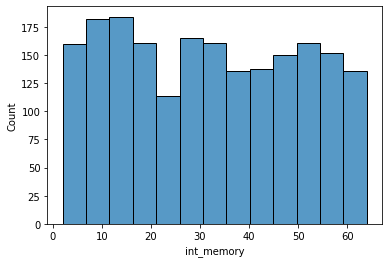

In [ ]:
sns.histplot(df["int_memory"])
plt.ticklabel_format()

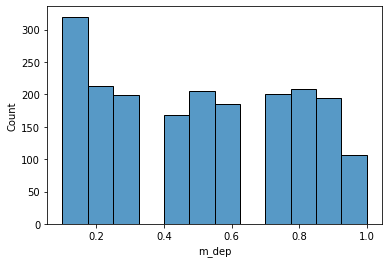

In [ ]:
sns.histplot(df["m_dep"])
plt.ticklabel_format()

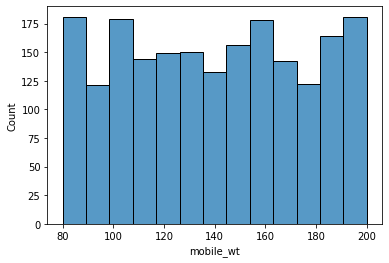

In [ ]:
sns.histplot(df["mobile_wt"])
plt.ticklabel_format()

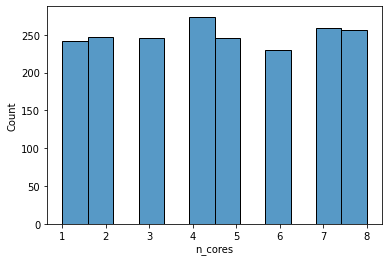

In [ ]:
sns.histplot(df["n_cores"])
plt.ticklabel_format()

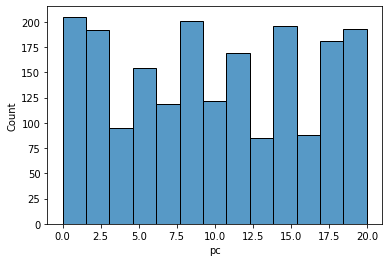

In [ ]:
sns.histplot(df["pc"])
plt.ticklabel_format()

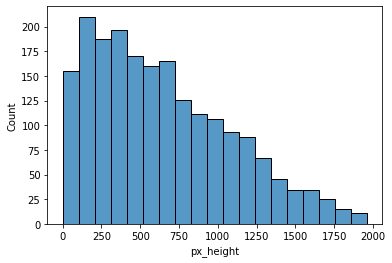

In [ ]:
sns.histplot(df["px_height"])
plt.ticklabel_format()

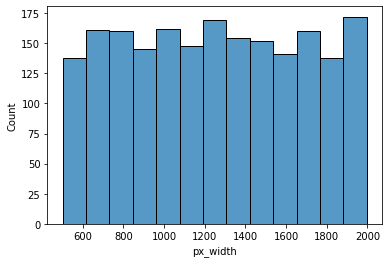

In [ ]:
sns.histplot(df["px_width"])
plt.ticklabel_format()

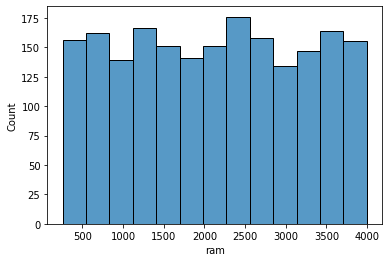

In [ ]:
sns.histplot(df["ram"])
plt.ticklabel_format()

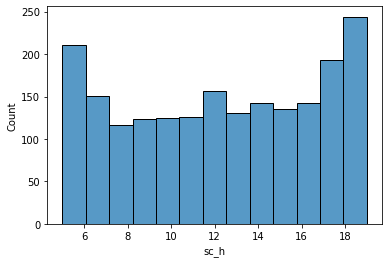

In [ ]:
sns.histplot(df["sc_h"])
plt.ticklabel_format()

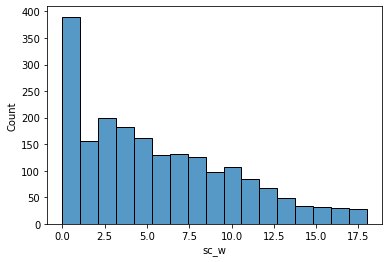

In [ ]:
sns.histplot(df["sc_w"])
plt.ticklabel_format()

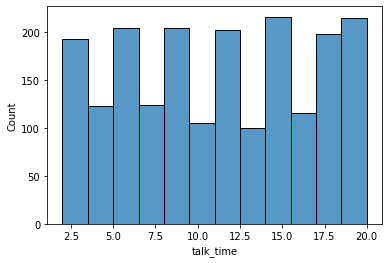

In [ ]:
sns.histplot(df["talk_time"])
plt.ticklabel_format()

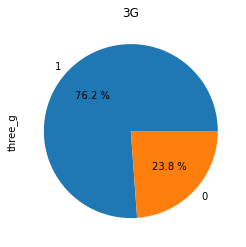

In [ ]:
df['three_g'].value_counts().plot(kind="pie",title="3G",autopct="%0.1f %%");

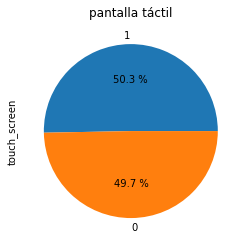

In [ ]:
df['touch_screen'].value_counts().plot(kind="pie",title="pantalla táctil",autopct="%0.1f %%");

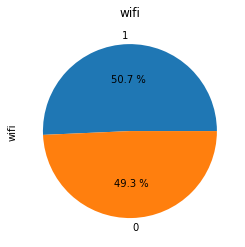

In [ ]:
df['wifi'].value_counts().plot(kind="pie",title="wifi",autopct="%0.1f %%");

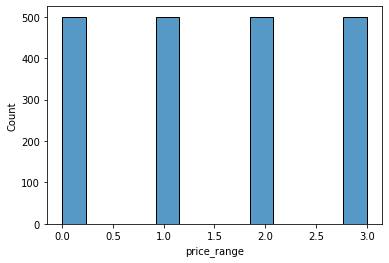

In [ ]:
sns.histplot(df["price_range"])
plt.ticklabel_format()

Luego de haber revisado cada caracteristica y su información por medio de historgramas y piecharts, vemos que no hay valores atipicos ni incosistencias.

Mapa de correlacion o Heatmap
```



In [ ]:
corr= df.corr().round(1)
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,0.1,0.0,-0.0,-0.0,0.2
blue,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
clock_speed,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
dual_sim,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
fc,0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
four_g,0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,-0.0,0.6,0.0,-0.0,0.0
int_memory,-0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
m_dep,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
mobile_wt,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
n_cores,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0


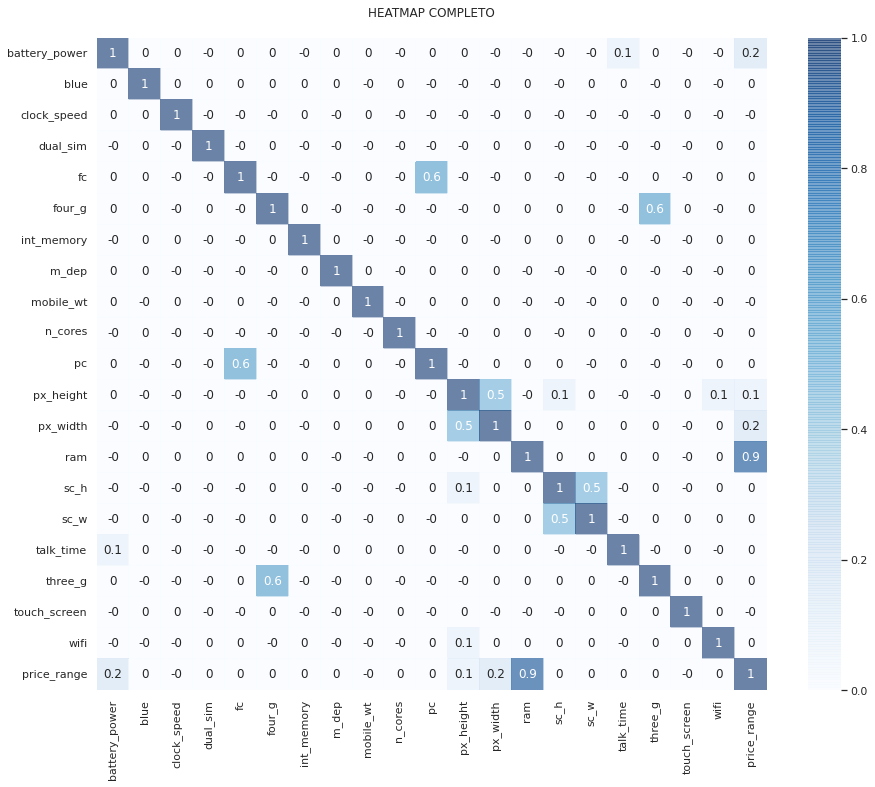

In [ ]:
corr = df.corr().round(1)
sns.set(rc = {'figure.figsize':(15,12)})
sns.set_theme(style="whitegrid")
plt.title("HEATMAP COMPLETO"+"\n", fontsize = 12)
sns.heatmap(corr, cmap = 'Blues', annot = True, alpha=0.6)

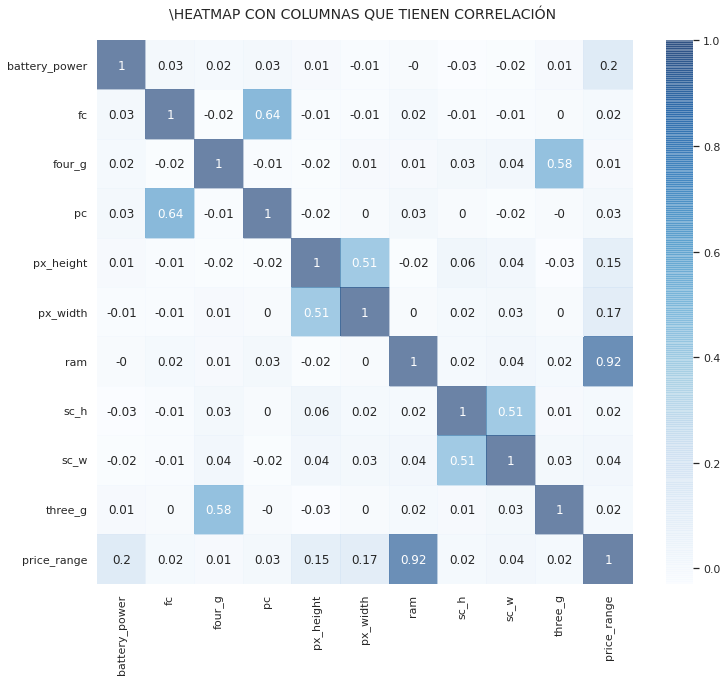

In [ ]:
df.drop(columns=["blue", "clock_speed", "dual_sim", "int_memory", "m_dep", "mobile_wt", "n_cores", "talk_time", "touch_screen", "wifi"], axis=1, inplace=True)
corr = df.corr().round(2)
sns.set(rc = {'figure.figsize':(12,10)})
sns.set_theme(style="whitegrid")
plt.title("\HEATMAP CON COLUMNAS QUE TIENEN CORRELACIÓN "+"\n", fontsize = 14)
sns.heatmap(corr, cmap = 'Blues', annot = True, alpha=0.6)

Conclusiones Mapa de calor:

Podemos observar que existe una alta relación con las variables fc y pc , ambas con (0.64), después tenemos a four_g y three_g con (0.58) y finalmente px_height y px_width con (0.51)
También tenemos una alta relación entre la variables Ram y price_range con un resultado de (0.92), siendo la más alta, por ende la cantidad de memoria ram es un factor decisivo a la hora del rango de pecio de los telefonos móviles.
todo caracteristica que tenga baja correlación fue eliminada.

Visualizaciones de correlaciones altas entre variables

Concentracion muy alta entre la caracteristica ram y vector objetivo price_range

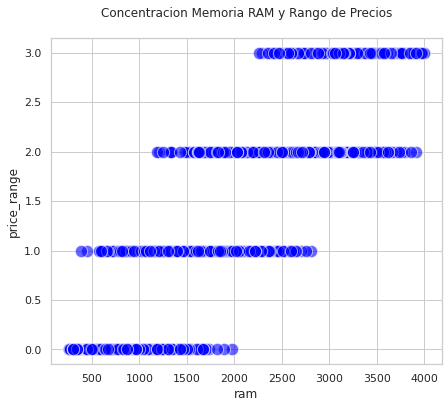

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Concentracion Memoria RAM y Rango de Precios\n', fontsize = 12);
sns.scatterplot(data=df, x='ram', y='price_range', color="blue", s=150, alpha=0.6, edgecolor="white");
plt.show()

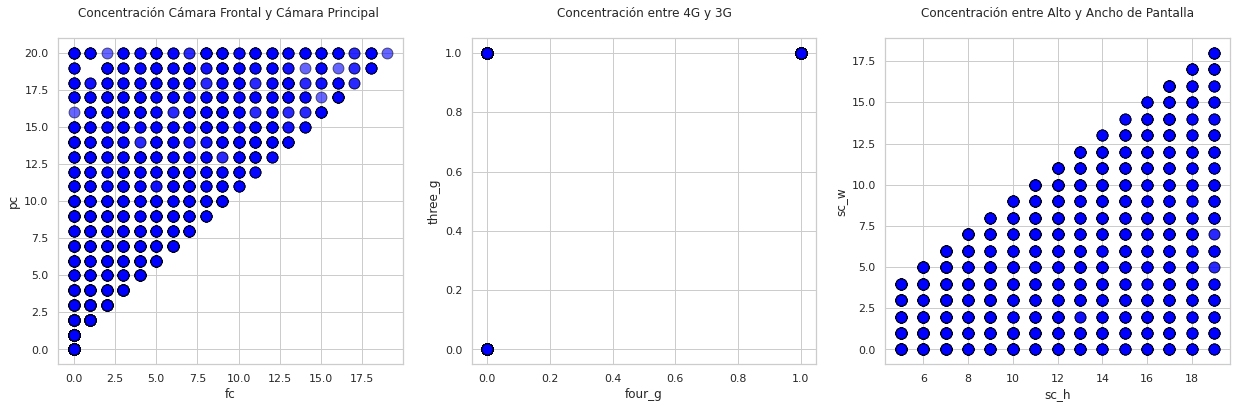

In [ ]:
plt.figure(figsize=(21,6))
# Subplot 1
plt.subplot(1, 3, 1);
plt.title('Concentración Cámara Frontal y Cámara Principal \n', fontsize = 12);
sns.scatterplot(data=df, x='fc', y='pc', color="blue", s=120, alpha=0.6, edgecolor="black");  
# Subplot 2
plt.subplot(1, 3, 2);
plt.title('Concentración entre 4G y 3G\n', fontsize = 12);
sns.scatterplot(data=df, x='four_g', y='three_g', color="blue", s=120, alpha=0.6, edgecolor="black");
# Subplot 
plt.subplot(1, 3, 3);
plt.title('Concentración entre Alto y Ancho de Pantalla\n', fontsize = 12);
sns.scatterplot(data=df, x='sc_h', y='sc_w', color="blue", s=120, alpha=0.6, edgecolor="black");
plt.show()

Visualización de graficos de barras de 3 de las caracteristicas con relaciones bajas en relación al objetivo

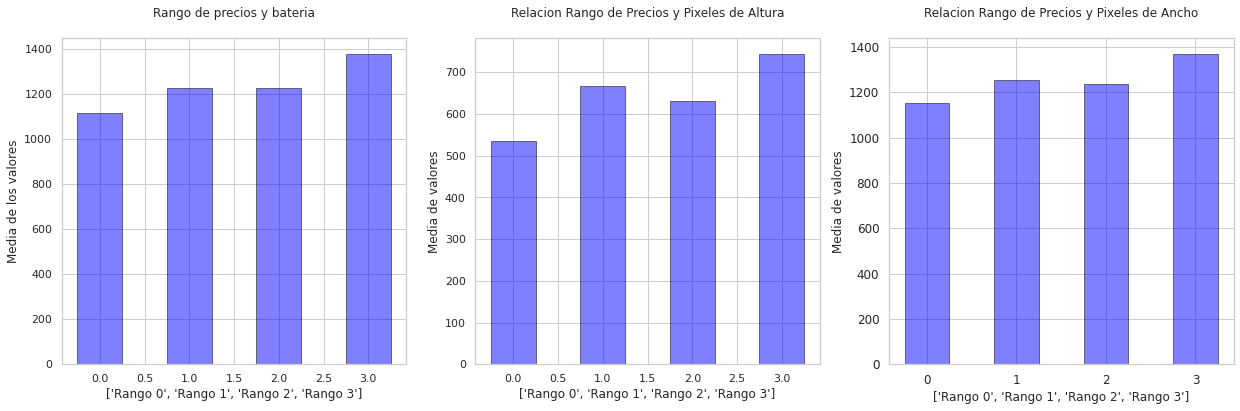

In [ ]:
rerango=list(range(4))
rerango_str=["Rango 0", "Rango 1", "Rango 2", "Rango 3"]
battery=df.groupby("price_range")["battery_power"].mean()
pxheight=df.groupby("price_range")["px_height"].mean()
pxwidth=df.groupby("price_range")["px_width"].mean()
fig, axes = plt.subplots(1,3, figsize = (21, 6))
axes[0].bar(rerango, battery, color='blue', edgecolor='black', alpha=0.5, width=0.5)
axes[0].set_title(f'Rango de precios y bateria\n', fontsize=12)
axes[0].set_xlabel(rerango_str) 
axes[0].set_ylabel('Media de los valores')
plt.xticks(rerango, fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
axes[1].bar(rerango, pxheight, color='blue', edgecolor='black', alpha=0.5, width=0.5)
axes[1].set_title(f'Relacion Rango de Precios y Pixeles de Altura\n', fontsize=12)
axes[1].set_xlabel(rerango_str)  
axes[1].set_ylabel('Media de valores')
plt.xticks(rerango, fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12) 
axes[2].bar(rerango, pxwidth, color='blue', edgecolor='black', alpha=0.5, width=0.5)
axes[2].set_title(f'Relacion Rango de Precios y Pixeles de Ancho\n', fontsize=12)
axes[2].set_xlabel(rerango_str) 
axes[2].set_ylabel('Media de valores')
plt.xticks(rerango, fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.show()
     

In [ ]:
precios_agrupados = df.groupby('price_range', as_index=False).mean().round(1)
precios_agrupados

,price_range,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g
0,0,1116.9,4.1,0.5,9.6,536.4,1150.3,785.3,12.3,5.7,0.7
1,1,1228.9,4.3,0.5,9.9,666.9,1251.9,1679.5,12.2,5.5,0.8
2,2,1228.3,4.5,0.5,10.0,632.3,1234.0,2582.8,12.0,5.7,0.8
3,3,1380.0,4.3,0.6,10.2,744.8,1369.8,3449.2,12.7,6.1,0.8


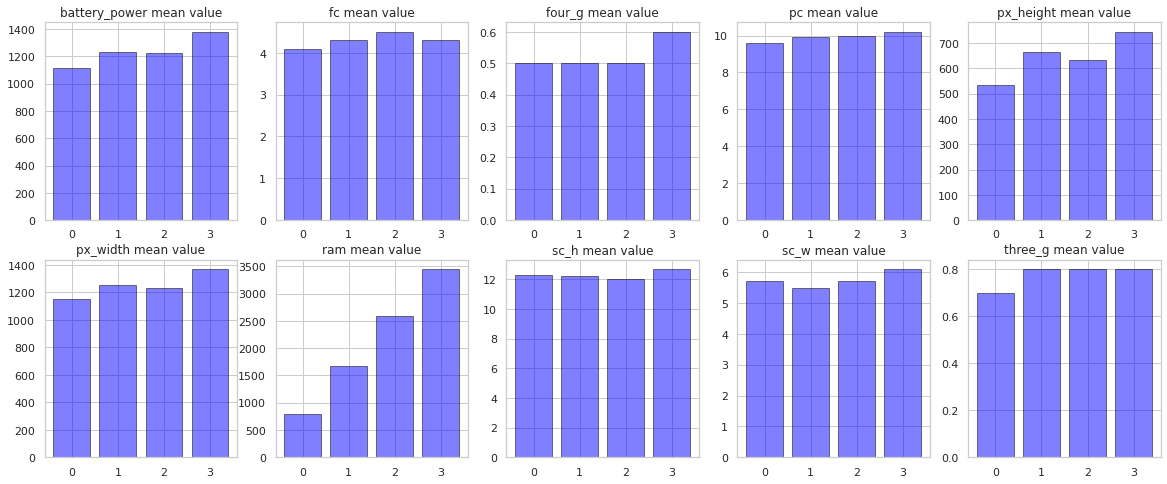

In [ ]:
fig, axes = plt.subplots(2,5, figsize = (20, 8))
axes = axes.ravel()
for i, col in enumerate(precios_agrupados.columns[1:]):
  axes[i].bar(precios_agrupados['price_range'], precios_agrupados[col], color='blue', edgecolor='black', alpha=0.5)
  axes[i].set_title(f'{col} mean value')

Conclusiones:

No se encontraron valores duplicados tanto en filas y columnas, así como tampoco valores nulos.

Encontramos por medio del mapa de calor 11 columnas que tienen correlación, de estas podemos decir que las que tienen una mayor concentración fueron la variable ram, pc, fc, four_g, three_g, sc_h,sc_w, pero la que tiene mayor correlación es la variable ram, por ende existe una relación grande entre la ram y price_range a la hora de determianr el precio de los telefonos móviles.

Con los graficos de barrar podemos concluir que la media para cada rango no varia demasiado en las caracteristicas que tienen baja correlación con el objetivo, si bien estas son 2 de las caracteristicas que tienen una baja correlación y dejamos algunas fuera, podemos evidenciar que nuestra atención se va a centrar en la relación entre la caracteristica ram y el objetivo (price_range)

Podemos ver que entre más Ram tiene el telefono movil mayor es su precio.


PARTE 3


Para esta parte del proyecto, crea una video presentación de 5-10 minutos con diapositivas que esté diseñada para una audiencia TÉCNICA que aborde tu presentación de datos y el análisis exploratorio para tu conjunto de datos seleccionado. 
Cosas que incluir en tu presentación:

Introducción y antecedentes del conjunto de datos
Explicación de los pasos de limpieza requeridos y una breve explicación de cómo los abordaste en tu conjunto de datos.
Si había valores nulos, explica cómo los abordaste.
Al menos dos imágenes exploratorias que hayas utilizado para comprender tu conjunto de datos y lo que has aprendido de cada una de ellas.
Si procede, cualquier desafío que has encontrado a medida que trabajas con este conjunto de datos y cómo los manejas.  
Compromete la presentación y el vídeo en tu repositorio de GitHub. 
Los archivos grandes se pueden guardar en Google Drive y el enlace se puede agregar en GitHub. Asegúrate de que la configuración de la compartición permite que cualquier persona con el enlace pueda ver el archivo.

PARTE 4

¡Ahora estás entrando a la fase de desarrollo del modelo del proyecto!

    Garantiza que completes los pasos de preprocesamiento adecuados
    Intenta múltiples modelos y afina los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye todos los modelos e hiperparámetros probados además del modelo final)
    Evalúa el rendimiento del modelo con las métricas adecuados para el modelo
    Elije tu modelo de “producción” y justifica esta decisión
    Vuelve a revisar tu código y garantiza que has proporcionados comentarios claros (recuerda que esto es para tu portafolio)
    Compromete tu código a GitHub

Revisión del conjunto de datos

In [ ]:
df.head() 

,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g,price_range
0,842,1,0,2,20,756,2549,9,7,0,1
1,1021,0,1,6,905,1988,2631,17,3,1,2
2,563,2,1,6,1263,1716,2603,11,2,1,2
3,615,0,0,9,1216,1786,2769,16,8,1,2
4,1821,13,1,14,1208,1212,1411,8,2,1,1


Vector Objetivo

In [ ]:
y = df['price_range']
X = df.drop(columns = ['price_range'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state = 42) 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
X_train_scaled.head()

,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g
0,-1.365030,0.469162,0.895434,-0.469054,0.973921,1.506504,-0.037450,0.716786,-0.122886,0.542677
1,0.100860,-0.903994,0.895434,-1.311160,-1.192053,-0.098837,-1.495178,-0.268487,-1.110917,0.542677
2,-0.961411,0.469162,0.895434,0.709896,-1.187400,-1.369351,-1.092410,-1.500077,-0.122886,0.542677
3,0.797214,-0.675135,0.895434,-0.805896,0.764535,0.928581,0.920458,-0.268487,0.124121,0.542677
4,-1.675506,0.698021,0.895434,1.552003,-0.198637,-1.438151,1.630881,0.963104,-1.110917,0.542677


Decision Tree Classifier

In [ ]:
df['price_range'].value_counts(normalize = True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.get_depth()

8

In [ ]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dec_tree.predict(X_test)

array([0, 2, 1, ..., 3, 3, 1])

In [ ]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.776875


In [ ]:
dec_three12 = RandomForestClassifier(max_depth=12, random_state = 42)
dec_three12.fit(X_train, y_train)
train_12_score = dec_three12.score(X_train, y_train)
test_12_score = dec_three12.score(X_test, y_test)
print(train_12_score)
print(test_12_score)

1.0
0.85875


Bagging Classifier

In [ ]:
y = df['price_range']
X = df.drop(columns = 'price_range')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
bagreg = BaggingClassifier(random_state = 42)
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
bagreg.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [ ]:
bagreg.predict(X_test)

array([0, 2, 1, 3, 1, 1, 2, 0, 2, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 3, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 0, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 1, 2,
       2, 1, 3, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 0, 1, 0, 1, 3, 3,

In [ ]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9933333333333333
0.902


In [ ]:
bagreg_9 = BaggingClassifier(n_estimators = 9, random_state = 42)
bagreg_9.fit(X_train, y_train)
train_9_score = bagreg_9.score(X_train, y_train)
test_9_score = bagreg_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.9933333333333333
0.906


MODELO KKN

In [ ]:
y = df['price_range']
X = df.drop(columns = 'price_range')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.get_params()

In [ ]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
predictions = knn_pipe.predict(X_test)
predictions

array([0, 1, 1, 3, 1, 0, 1, 0, 3, 1, 0, 0, 1, 3, 2, 1, 3, 3, 1, 0, 0, 1,
       0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 3, 0, 2, 3, 1, 0,
       1, 2, 1, 1, 3, 0, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 2, 3, 0, 1, 1,
       3, 3, 1, 1, 1, 2, 0, 1, 2, 0, 0, 3, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2,
       3, 0, 2, 2, 1, 1, 2, 3, 1, 3, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1,
       0, 1, 2, 1, 2, 2, 3, 2, 0, 2, 0, 1, 2, 1, 2, 3, 0, 2, 0, 2, 3, 1,
       2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 3, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 3, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0,
       1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 3, 2, 1, 1, 2, 3, 0, 1, 3,
       2, 3, 0, 2, 2, 2, 3, 2, 2, 1, 0, 3, 3, 2, 3, 3, 3, 3, 2, 0, 1, 1,
       1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 3, 3, 0, 2, 0, 1, 3, 0, 1,
       0, 0, 3, 0, 1, 3, 2, 3, 2, 0, 1, 0, 0, 3, 3,

In [ ]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.622

In [ ]:
acc_score = knn_pipe.score(X_train, y_train)
acc_score

0.82

In [ ]:
y = df['price_range']
X = df.drop(columns = 'price_range')

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

In [ ]:
predictions = knn_pipe.predict(X_test)
predictions

array([0, 3, 1, 3, 2, 1, 1, 0, 3, 1, 0, 0, 1, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       0, 2, 0, 1, 3, 2, 3, 0, 0, 0, 2, 0, 0, 1, 3, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 0, 3, 1, 3, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 0, 2, 1, 3, 0, 2, 2, 0, 0, 3, 2, 1, 3, 2, 1, 0, 0, 2, 0, 3,
       3, 0, 2, 3, 2, 1, 3, 2, 2, 3, 2, 0, 0, 0, 1, 0, 0, 3, 2, 0, 0, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 2, 1, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 3, 2, 0, 0, 0, 1, 1, 2, 3, 0, 1, 0,
       3, 1, 0, 1, 0, 0, 2, 3, 3, 3, 1, 1, 1, 3, 1, 2, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 1, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 1, 1, 3, 0, 1, 2, 0, 1, 3, 1, 0, 0, 2, 3, 0, 1, 3,
       2, 3, 0, 3, 0, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 2, 2, 3, 3, 1, 2, 2,
       3, 2, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 3,
       0, 0, 2, 0, 2, 3, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [ ]:
acc_score = knn_pipe.score(X_train, y_train)
acc_score

0.7466666666666667

In [ ]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.734

TABLA DE COMPARACIÓN MODELOS

| Modelo                    | Parametro    | Número de parametro ajustado | Train Accuracy | Test Accuracy |
|---------------------------|--------------|------------------------------|----------------|---------------|
| Decision Three Classifier | max_depth    |            12                |      1.0       |      0.9      |
| Kneighbors Classifier     | n_neighbors  |           100                |     0.74       |      0.73     |
| Bagging Classifier        | n_estimators |            9                 |      0.99      |      0.93     |

El modelo que mejor funciona de los 3 utilizados es el es el Bagging Classifier, en el train accuracy tiene 0.99, mientras que en el test accuracy tiene un 0.93.

Conclusiones finales

La caracteristica Ram es el principal factor que indice en el valor del precio de los telefonos móviles.
De los 3 modelos de clasificación seleccionados para evaluar los resultados (Decision Three Classifier, Kneighbors Classifier y Bagging Classifier) podemos señalar que fue el último modelo fue el que arrojo el mejor resultado con un accuracy de 0.99 en el train y un 0.93 en el test.
Al analizar las caracteristicas que tiene correlación con el vector obejtivo solo encontramos 11 de ellas con las que si se podian trabajar, las restantes fueron eliminadas.

## Referencias

* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification